In [7]:
import pymysql
from config.DatabaseConfig import * # DB 접속 정보 불러오기

DB_HOST = "localhost"
DB_USER = "myuser118"
DB_PASSWORD = "1234"
DB_NAME = "mydb118"

def DatabaseConfig():
    global DB_HOST, DB_USER, DB_PASSWORD, DB_NAME

db = None
try:
    db = pymysql.connect(
        host=DB_HOST,
        user=DB_USER,
        passwd=DB_PASSWORD,
        db=DB_NAME,
        charset='utf8'
    )

    # 테이블 생성 sql 정의

#     sql = '''
#       CREATE TABLE IF NOT EXISTS `answer_data` (
#       `id` INT UNSIGNED NOT NULL AUTO_INCREMENT,
#       `intent` VARCHAR(30) NULL,
#       `ner` VARCHAR(50) NULL,
#       `query` TEXT NULL,
#       `answer` TEXT NULL,
#       `answer2` TEXT NULL,
#       `answer_image` VARCHAR(500) NULL,
#       PRIMARY KEY (`id`))
#     ENGINE = InnoDB DEFAULT CHARSET=utf8
#     '''
    
    
#     sql = '''
#       CREATE TABLE IF NOT EXISTS `order_detail` (
#       `id` INT UNSIGNED NOT NULL AUTO_INCREMENT,
#       `user_id` INT NOT NULL UNIQUE,
#       PRIMARY KEY (`id`))
#     ENGINE = InnoDB DEFAULT CHARSET=utf8
#     '''

#     sql = '''
#         CREATE TABLE IF NOT EXISTS `product_option` (
#         `id` INT UNSIGNED NOT NULL,
#         `option` INT UNSIGNED,
#         `price` INT UNSIGNED,
#         `product_id` INT UNSIGNED,
#         PRIMARY KEY (`id`),
#         FOREIGN KEY(`product_id`) REFERENCES `product_cafe`(`id`) ON UPDATE CASCADE)
#         ENGINE = InnoDB DEFAULT CHARSET=utf8
#     '''

#     sql = '''
#           CREATE TABLE IF NOT EXISTS `cart_item` (
#           `id` INT UNSIGNED NOT NULL AUTO_INCREMENT,
#           `count` INT NOT NULL,
#           `product_id` INT UNSIGNED,
#           `option_id` INT UNSIGNED,
#           `user_id` INT NOT NULL,
#           PRIMARY KEY (`id`),
#           FOREIGN KEY (`product_id`) REFERENCES `product_cafe`(`id`) ON UPDATE CASCADE,
#           FOREIGN KEY (`option_id`) REFERENCES `product_option`(`id`) ON UPDATE CASCADE)
#           ENGINE = InnoDB DEFAULT CHARSET=utf8
#         ''' 

#     sql = '''
#           CREATE TABLE IF NOT EXISTS `order_item` (
#           `id` INT UNSIGNED NOT NULL AUTO_INCREMENT,
#           `order_id` INT UNSIGNED,
#           `product_id` INT UNSIGNED,
#           `option_id` INT UNSIGNED,
#           `count` INT NOT NULL,
#           PRIMARY KEY (`id`),
#           FOREIGN KEY (`order_id`) REFERENCES `order_detail`(`id`) ON UPDATE CASCADE,
#           FOREIGN KEY (`product_id`) REFERENCES `product_cafe`(`id`) ON UPDATE CASCADE,
#           FOREIGN KEY (`option_id`) REFERENCES `product_option`(`id`) ON UPDATE CASCADE)
#           ENGINE = InnoDB DEFAULT CHARSET=utf8
#         '''

    # 테이블 생성
    with db.cursor() as cursor:
        cursor.execute(sql)

except Exception as e:
    print(e)

finally:
    if db is not None:
        db.close()



In [2]:
import pandas as pd

In [55]:
df = pd.read_excel(r'train_tools/qna/Answer_data.xlsx')
df

,의도(Intent),개체명(NER),고객의 요구,요구에 대한 답변(Answer),2차 답변(Answer2),답변 이미지
0,메뉴판 요구,NaN,"메뉴판 주세요, 메뉴판 줘",메뉴판,NaN,PrintedMenus.png
1,주문,{B_FOOD},"{B_FOOD} 주세요\n{B_FOOD} 주문, {B_FOOD} 줘",추가 옵션을 선택해주세요\n없으시다면 0을 입력해주세요\n1 = 샷추가\n2 = 시...,추가하실 메뉴가 있으시면 <장바구니>를\n결제를 원하시면 <선택완료>를 입력해주세요,NaN
2,추천메뉴,{B_RECOMMEND},{B_RECOMMEND} 메뉴 뭐야?\n메뉴 추천해줘\n메뉴 추천부탁드립니다.,{B_RECOMMEND}메뉴는 아래와 같습니다,NaN,NaN
3,"결제, 쿠폰, 포인트",{B_PAY},{B_PAY}사용 가능할까요?\n{B_PAY}결제 되나요?\n{B_PAY} 결제,{B_PAY}에 관한 결제/할인/쿠폰 중 어떤 설명을 원하시나요?,[결제/쿠폰/포인트] 설명입니다,coupon.png
4,원산지,NaN,"원두의 원산지가 어떻게 되죠?\n원두 어디거예요?\n원두, 원산지 어디야? 원두 어...",커피 원두의 원산지 정보입니다.,NaN,wondu.JPG
5,"시설, 위치",{B_FACILITY},"{B_FACILITY} 어디 있나요?\n{B_FACILITY} 어디에요?, {B_F...",시설 안내입니다\n\n저희 카페 화장실은 정문 우측에 있는 계단으로 올라가서 복도 ...,NaN,NaN
6,영업시간,NaN,몇시에 끝나나요? 영업시간이 언제까지인가요?,저희 카페 영업시간은\n월 08:00 - 21:00\n화 08:00 - 21:40\...,NaN,NaN
7,텀블러,NaN,"텀블러에 담아주실수 있나요?, 텀블러 할인 있나요?",텀블러 규정 입니다,NaN,NaN
8,테이크아웃,NaN,"테이크아웃 싸줘\n테이크 아웃이요, 포장이요, 가져갈게요\n포장이요, 밖에서 먹을게...",테이크 아웃 설명입니다,NaN,NaN
9,주문취소,{B_FOOD},주문 취소할게,해당 {B_FOOD}의 주문번호를 입력해주세요,주문이 취소되었습니다.,NaN


In [10]:
import pymysql
import openpyxl

from config.DatabaseConfig import * # DB 접속 정보 불러오기


In [11]:
# 학습 데이터 초기화
def all_clear_train_data(db):
    # 기존 학습 데이터 삭제
    sql = '''
            delete from answer_data
        '''
    with db.cursor() as cursor:
        cursor.execute(sql)

    # auto increment 초기화
    sql = '''
    ALTER TABLE answer_data AUTO_INCREMENT=1
    '''
    with db.cursor() as cursor:
        cursor.execute(sql)


# db에 데이터 저장
def insert_data(db, xls_row):
    intent, ner, query, answer, answer2, answer_img_url = xls_row

    sql = '''
        INSERT answer_data(intent, ner, query, answer, answer2, answer_image) 
        values(
         '%s', '%s', '%s', '%s', '%s', '%s'
        )
    ''' % (intent.value, ner.value, query.value, answer.value, answer2.value, answer_img_url.value)

    # 엑셀에서 불러온 cell에 데이터가 없는 경우, null 로 치환
    sql = sql.replace("'None'", "null")

    with db.cursor() as cursor:
        cursor.execute(sql)
        print('{} 저장'.format(query.value))
        db.commit()

In [12]:
train_file = r'./train_tools/qna/Answer_data.xlsx'
db = None
try:
    db = pymysql.connect(
        host=DB_HOST,
        user=DB_USER,
        passwd=DB_PASSWORD,
        db=DB_NAME,
        charset='utf8'
    )

    # 기존 학습 데이터 초기화
    all_clear_train_data(db)

    # 학습 엑셀 파일 불러오기
    wb = openpyxl.load_workbook(train_file)
    sheet = wb['Answer_data']
    for row in sheet.iter_rows(min_row=2): # 해더는 불러오지 않음
        # 데이터 저장
        insert_data(db,row)

    wb.close()

except Exception as e:
    print(e)

finally:
    if db is not None:
        db.close()



메뉴판 주세요, 메뉴판 줘 저장
{B_FOOD} 주세요
{B_FOOD} 주문, {B_FOOD} 줘 저장
{B_RECOMMEND} 메뉴 뭐야?
메뉴 추천해줘
메뉴 추천부탁드립니다. 저장
{B_PAY}사용 가능할까요?
{B_PAY}결제 되나요?
{B_PAY} 결제 저장
원두의 원산지가 어떻게 되죠?
원두 어디거예요?
원두, 원산지 어디야? 원두 어디꺼야? 저장
{B_FACILITY} 어디 있나요?
{B_FACILITY} 어디에요?, {B_FACILITY} 돼? 저장
몇시에 끝나나요? 영업시간이 언제까지인가요? 저장
텀블러에 담아주실수 있나요?, 텀블러 할인 있나요? 저장
테이크아웃 싸줘
테이크 아웃이요, 포장이요, 가져갈게요
포장이요, 밖에서 먹을게요
캐리어에 싸줘 저장
주문 취소할게 저장


In [43]:
import pymysql
import pymysql.cursors
import logging


class Database:
    '''
    database 제어
    '''

    def __init__(self, host, user, password, db_name, charset='utf8'):
        self.host = host
        self.user = user
        self.password = password
        self.charset = charset
        self.db_name = db_name
        self.conn = None

    # DB 연결
    def connect(self):
        if self.conn != None:
            return

        self.conn = pymysql.connect(
            host=self.host,
            user=self.user,
            password=self.password,
            db=self.db_name,
            charset=self.charset
        )

    # DB 연결 닫기
    def close(self):
        if self.conn is None:
            return

        if not self.conn.open:
            self.conn = None
            return
        self.conn.close()
        self.conn = None

    # SQL 구문 실행
    def execute(self, sql):
        last_row_id = -1
        try:
            with self.conn.cursor() as cursor:
                cursor.execute(sql)
            self.conn.commit()
            last_row_id = cursor.lastrowid
            # logging.debug("excute last_row_id : %d", last_row_id)
        except Exception as ex:
            logging.error(ex)

        finally:
            return last_row_id

    # SELECT 구문 실행 후, 단 1개의 데이터 ROW만 불러옴
    def select_one(self, sql):
        result = None

        try:
            with self.conn.cursor(pymysql.cursors.DictCursor) as cursor:
                cursor.execute(sql)
                result = cursor.fetchone()
        except Exception as ex:
            logging.error(ex)

        finally:
            return result

    # SELECT 구문 실행 후, 전체 데이터 ROW만 불러옴
    def select_all(self, sql):
        result = None

        try:
            with self.conn.cursor(pymysql.cursors.DictCursor) as cursor:
                cursor.execute(sql)
                result = cursor.fetchall()
        except Exception as ex:
            logging.error(ex)

        finally:
            return result



## 답변 검색 모듈

그림 8-2 챗봇엔진 답변 검색 과정

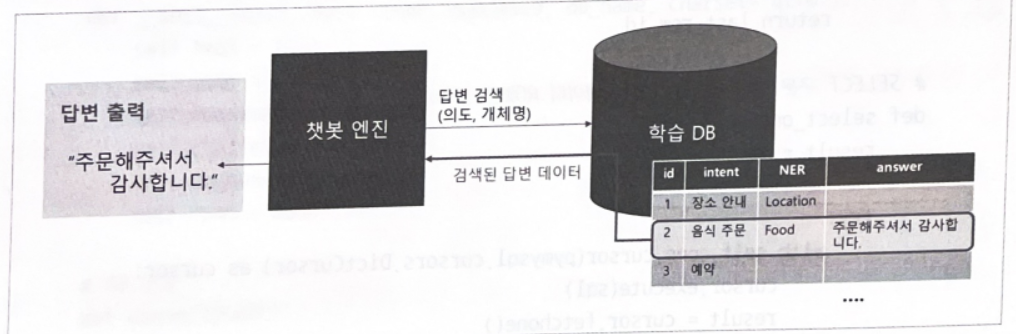

**/utils/FindAnswer.py** 

In [44]:
class FindAnswer:
    
    # Database 인스턴스 객체로 생성
    def __init__(self, db):
        self.db = db    # 이 객체를 통해 답변을 검색
        
    # ② 답변 검색
    # 의도명(intent_name) 과 개체명 태그 리스트(ner_tags) 를 이용해 질문의 답변을 검색
    def search(self, intent_name, ner_tags):  
        # 의도명, 개체명으로 답변 검색
        sql = self._make_query(intent_name, ner_tags)
        answer = self.db.select_one(sql)
        
        # 검색되는 답변이 없었으면 의도명만 이용하여 답변 검색
        # 챗봇이 찾는 정확한 조건의 답변이 없는 경우 차선책으로 동일한 의도를 가지는 답변을 검색
        # (의도가 동일한 경우 답변도 유사할 확률이 높다!)      
        if answer is None:
            sql = self._make_query(intent_name, None)
            answer = self.db.select_one(sql)
            
        return (answer['answer'], answer['answer_image'])
    
    # ③ 검색 쿼리 생성
    # '의도명' 만 검색할지, 여러종류의 개체명 태그와 함께 검색할지 결정하는 '조건'을 만드는 간단한 함수
    def _make_query(self, intent_name, ner_tags):
        sql = "select * from answer_data"
        if intent_name != None and ner_tags == None:
            sql = sql + " where intent='{}' ".format(intent_name)

        elif intent_name != None and ner_tags != None:
            where = ' where intent="%s" ' % intent_name
            if (len(ner_tags) > 0):
                where += 'and ('
                for ne in ner_tags:
                    where += " ner like '%{}%' or ".format(ne)
                where = where[:-3] + ')'
            sql = sql + where    
            
        # 동일한 답변이 2개 이상인 경우 랜덤으로 선택
        sql = sql + " order by rand() limit 1"
        return sql       
    
    # ④ NER 태그를 실제 입력된 단어로 치환
    
    # 예를 들어 '자장명 주문할께요' 라는 텍스트가 챗본 엔진에 입력되었다고 합시다.
    # 그러면 챗봇 엔진은 '자장명'을 'B_FOOD 객체명'으로 인식합니다.
    # 이때 검색된 답변이 '{B_FOOD} 주문 처리 완료 되었습니다 주문해주셔서 감사합니다' 라고 한다면,
    # 답변 내용속 '{B_FOOD}' 를 '자장면' 으로 치환해 주는 함수입니다.
    # 치환해야 하는 태그가 더 존재한다면 치환 규칙을 추가하면 됩니다.
    
    def tag_to_word(self, ner_predicts, answer):    
        for word, tag in ner_predicts:

            # 변환해야하는 태그가 있는 경우 추가
            if tag == 'B_FOOD' or tag == 'B_PAY' or tag == 'B_FACILITY' or tag == 'B_RECOMMEND':
                answer = answer.replace(tag, word)

        answer = answer.replace('{', '')
        answer = answer.replace('}', '')
        return answer        

In [45]:
def _make_query(intent_name, ner_tags):
    sql = "select * from answer_data"
    if intent_name != None and ner_tags == None:
        sql = sql + " where intent='{}' ".format(intent_name)

    elif intent_name != None and ner_tags != None:
        where = ' where intent="%s" ' % intent_name
        if (len(ner_tags) > 0):
            where += 'and ('
            for ne in ner_tags:
                where += " ner like '%{}%' or ".format(ne)
            where = where[:-3] + ')'
        sql = sql + where 
        
    # 동일한 답변이 2개 이상인 경우 랜덤으로 선택
    sql = sql + " order by rand() limit 1"
    return sql

In [46]:
print(_make_query('주문', ['B_FOOD', 'B_PAY']))

select * from answer_data where intent="주문" and ( ner like '%B_FOOD%' or  ner like '%B_PAY%' ) order by rand() limit 1


## 챗봇 엔진 동작 테스트

In [1]:
from config.DatabaseConfig import *
from utils.Database import Database
from utils.Preprocess import Preprocess
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing


In [2]:
# 전처리 객체 생성
p = Preprocess(word2index_dic='./train_tools/dict/chatbot_dict.bin',
               userdic='./utils/train.tsv')


In [3]:
# 질문/답변 학습 디비 연결 객체 생성
db = Database(
    host=DB_HOST, user=DB_USER, password=DB_PASSWORD, db_name=DB_NAME
)
db.connect()    # 디비 연결

In [50]:
# 질의 문장
query = "아메리카노 주문"

In [6]:
# 의도 분류
from models.intent.IntentModel import IntentModel
intent = IntentModel(model_name='./models/intent/best_intent_model.h5', preprocess=p)

In [7]:
predict = intent.predict_class(query)
predict

1

In [8]:
intent_name = intent.labels[predict]
intent_name

'주문'

In [9]:
from models.ner.NerModel import NerModel
ner = NerModel(model_name='./models/ner/best_ner_model.h5', preprocess=p)

In [10]:
predicts = ner.predict(query)
predicts

[('아메리카노', 'B_FOOD'), ('주문', 'O')]

In [11]:
ner_tags = ner.predict_tags(query)
print(ner_tags)

['B_FOOD']


In [12]:
print("질문 : ", query)
print("=" * 100)
print("의도 파악 : ", intent_name)
print("개체명 인식 : ", predicts)
print("답변 검색에 필요한 NER 태그 : ", ner_tags)
print("=" * 100)

질문 :  아메리카노 주문
의도 파악 :  주문
개체명 인식 :  [('아메리카노', 'B_FOOD'), ('주문', 'O')]
답변 검색에 필요한 NER 태그 :  ['B_FOOD']


In [6]:
from utils.FindProduct import FindProduct

f = FindProduct(db)
if f.search('호로록'):
    print('성공')
else:
    print('실패')

ERROR:root:(1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '= '호로록'' at line 1")


실패
